## Import and Clean MTA Data 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime as dt

In [2]:
#Targeting data in April 2018 to determine resource deployment for gala in June 2019

def get_data(week_nums):
    url = ("http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt")
    df = []
    for week in week_nums:
        week_url = url.format(week)
        df.append(pd.read_csv(week_url))
    return pd.concat(df)

week_nums = [180407, 180414, 180421, 180428]
mta_df = get_data(week_nums)     

In [3]:
mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055


In [4]:
mta_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197574,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,05:00:00,REGULAR,2877053,386148
197575,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,09:00:00,REGULAR,2877060,386149
197576,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,13:00:00,REGULAR,2877136,386151
197577,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,17:00:00,REGULAR,2877237,386156
197578,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/27/2018,21:00:00,REGULAR,2877307,386159


In [5]:
mta_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
mta_df.DATE.value_counts().sort_index()

03/31/2018    28129
04/01/2018    28084
04/02/2018    28049
04/03/2018    28189
04/04/2018    28154
04/05/2018    28262
04/06/2018    28121
04/07/2018    28161
04/08/2018    28132
04/09/2018    28036
04/10/2018    28085
04/11/2018    28087
04/12/2018    27981
04/13/2018    28109
04/14/2018    28183
04/15/2018    28155
04/16/2018    28087
04/17/2018    28091
04/18/2018    28098
04/19/2018    28330
04/20/2018    28244
04/21/2018    28185
04/22/2018    28280
04/23/2018    28374
04/24/2018    28264
04/25/2018    28325
04/26/2018    28105
04/27/2018    28046
Name: DATE, dtype: int64

In [7]:
'''
Create new date/time field to see timestamp associated with each date.
Then subtract one minute off each timestamp to move midnight entries onto previous day,
so they are included in our count.

Create a second Date column to extract the revised date and use 'Date_2' going forward in our analysis.

'''
mta_df['DATE_TIME'] = pd.to_datetime(mta_df['DATE']+ ' ' + mta_df['TIME'], format = "%m/%d/%Y %H:%M:%S") - pd.Timedelta(minutes=1)
mta_df['DATE_2'] = mta_df['DATE_TIME'].dt.date
#mta_df['DATE_2'] = mta_df['DATE_TIME'].apply(lambda x: x.date()) #alternate method using lambda functions

In [8]:
mta_df.info() #Check DateTime is a datetime object so the date can be extracted into 'Date_2'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788346 entries, 0 to 197578
Data columns (total 13 columns):
C/A                                                                     788346 non-null object
UNIT                                                                    788346 non-null object
SCP                                                                     788346 non-null object
STATION                                                                 788346 non-null object
LINENAME                                                                788346 non-null object
DIVISION                                                                788346 non-null object
DATE                                                                    788346 non-null object
TIME                                                                    788346 non-null object
DESC                                                                    788346 non-null object
ENTRIES                           

In [9]:
mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_2
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050,2018-03-30 23:59:00,2018-03-30
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053,2018-03-31 03:59:00,2018-03-31
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053,2018-03-31 07:59:00,2018-03-31
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055,2018-03-31 11:59:00,2018-03-31
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055,2018-03-31 15:59:00,2018-03-31


In [10]:
#Check for unique entries

(mta_df
 .groupby(by = ['C/A','UNIT','SCP','STATION','DATE_TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES")).tail()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
262785,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-08 23:59:00,1
262786,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-09 03:59:00,1
262765,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-05 15:59:00,1
788344,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2018-04-27 20:59:00,1
267110,N183,R415,00-00-00,BROAD CHANNEL,2018-04-04 04:59:00,2


In [11]:
#On April 4th we have two entries for Broad Channel, filter for these

duplicate_mask = ((mta_df['C/A'] == 'N183') & 
                  (mta_df['UNIT'] == 'R415') & 
                  (mta_df['SCP'] == '00-00-00') & 
                  (mta_df['STATION'] == 'BROAD CHANNEL') &
                  (mta_df['DATE_TIME'].dt.date == datetime.datetime(2018,4,4).date()))

In [12]:
mta_df[duplicate_mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_2
67019,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,01:00:00,REGULAR,36983,25347,2018-04-04 00:59:00,2018-04-04
67020,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,05:00:00,REGULAR,36995,25351,2018-04-04 04:59:00,2018-04-04
67021,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,05:00:00,RECOVR AUD,36994,25351,2018-04-04 04:59:00,2018-04-04
67022,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,09:00:00,REGULAR,37045,25359,2018-04-04 08:59:00,2018-04-04
67023,N183,R415,00-00-00,BROAD CHANNEL,AS,IND,04/04/2018,13:00:00,REGULAR,37050,25366,2018-04-04 12:59:00,2018-04-04


In [13]:
#The April 4th data has an entry with the line description 'Recover Aud'
#The entry count for this date is one less than the 'Regular' count and exit count is the same
#We deem this difference immaterial thus conclude it can be ignored for the remainder of the analysis


In [14]:
#Check value count of descriptions before remove duplicate values

mta_df.DESC.value_counts()

REGULAR       786070
RECOVR AUD      2276
Name: DESC, dtype: int64

In [15]:
mta_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=False)
mta_df.drop_duplicates(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [16]:
#Check that the Broad Channel entry is removed

(mta_df
 .groupby(by = ['C/A','UNIT','SCP','STATION','DATE_TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES")).tail()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
262784,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-08 19:59:00,1
262785,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-08 23:59:00,1
262786,N141,R356,00-00-02,OZONE PK LEFFRT,2018-04-09 03:59:00,1
262908,N141,R356,00-00-03,OZONE PK LEFFRT,2018-04-01 15:59:00,1
788344,TRAM2,R469,00-03-01,RIT-ROOSEVELT,2018-04-27 20:59:00,1


In [17]:
#Check value count of descriptions after remove duplicate values

mta_df.DESC.value_counts()

REGULAR       786070
RECOVR AUD      2275
Name: DESC, dtype: int64

In [18]:
#Resort data in chronological order

mta_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, \
                          ascending=True)

In [19]:
mta_df2 = mta_df#.drop(["C/A", "UNIT", "SCP", "LINENAME", "DIVISION", "DESC", "EXITS", "DATE_TIME"], axis=1, errors="ignore")

In [20]:
#Check that all columns are the same

mta_df2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATE_TIME', 'DATE_2'],
      dtype='object')

In [21]:
#Remove whitespace after Exits so we can delete that column

mta_df2.columns = [column.strip() for column in mta_df2.columns]
mta_df2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'DATE_2'],
      dtype='object')

In [22]:
mta_df2 = mta_df2.drop(["EXITS"], axis=1, errors="ignore") #did not drop DATE_TIME

In [23]:
mta_df2.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2018-03-30 23:59:00,2018-03-30
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2018-03-31 03:59:00,2018-03-31
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2018-03-31 07:59:00,2018-03-31
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2018-03-31 11:59:00,2018-03-31
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2018-03-31 15:59:00,2018-03-31
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,REGULAR,6566470,2018-03-31 19:59:00,2018-03-31
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,REGULAR,6566470,2018-03-31 23:59:00,2018-03-31
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,REGULAR,6566470,2018-04-01 03:59:00,2018-04-01
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,REGULAR,6566470,2018-04-01 07:59:00,2018-04-01
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,REGULAR,6566470,2018-04-01 11:59:00,2018-04-01


In [24]:
mta_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2018-03-30 23:59:00,2018-03-30
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2018-03-31 03:59:00,2018-03-31
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2018-03-31 07:59:00,2018-03-31
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2018-03-31 11:59:00,2018-03-31
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2018-03-31 15:59:00,2018-03-31


In [25]:
#Groupby Station and Date to see listing of total entries only

mta_df2.groupby(by = ['STATION', 'DATE_2'])['ENTRIES'].head()

0         6566463
1         6566470
2         6566470
3         6566470
4         6566470
5         6566470
7         6566470
8         6566470
9         6566470
10        6566470
11        6566470
13        6566470
14        6566495
15        6566629
16        6566839
17        6567469
19        6567630
20        6567660
21        6567822
22        6568094
23        6568775
25        6568924
26        6568955
27        6569103
28        6569377
29        6570115
31        6570307
32        6570338
33        6570480
34        6570768
           ...   
197417    4050380
197418    4050390
197419    4050434
197420    4050914
197421    4051900
197423    4052725
197424    4052730
197425    4053239
197426    4053681
197427    4054044
197429    4054380
197430    4054383
197431    4054787
197432    4055230
197433    4055599
197435    4055869
197436    4055870
197437    4056234
197438    4056774
197439    4056955
197441    4057139
197442    4057140
197443    4057501
197444    4057974
197445    

In [26]:
#Calculate incremental difference in entries for each timestamp

mta_df2['incremental_ppl'] = mta_df2.groupby(by = ['C/A', 'UNIT', 'SCP', 'STATION','DATE_2'])['ENTRIES'].diff()
mta_df2.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2018-03-30 23:59:00,2018-03-30,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2018-03-31 03:59:00,2018-03-31,NaN
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2018-03-31 07:59:00,2018-03-31,0.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2018-03-31 11:59:00,2018-03-31,0.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2018-03-31 15:59:00,2018-03-31,0.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,REGULAR,6566470,2018-03-31 19:59:00,2018-03-31,0.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,REGULAR,6566470,2018-03-31 23:59:00,2018-03-31,0.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,REGULAR,6566470,2018-04-01 03:59:00,2018-04-01,NaN
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,REGULAR,6566470,2018-04-01 07:59:00,2018-04-01,0.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,REGULAR,6566470,2018-04-01 11:59:00,2018-04-01,0.0


In [27]:
#Add incremental difference in entries per timestamp to calculate number of people entering each turnstile per day 

mta_df2.groupby(by = ['STATION','C/A','UNIT','SCP','DATE'])[['incremental_ppl']].sum()

incremental_ppl
STATION   C/A  UNIT SCP      DATE                       
1 AV      H007 R248 00-00-00 03/31/2018           1825.0
                             04/01/2018           1784.0
                             04/02/2018           3213.0
                             04/03/2018           3474.0
                             04/04/2018           3630.0
                             04/05/2018           3880.0
                             04/06/2018           3837.0
                             04/07/2018           2334.0
                             04/08/2018           2170.0
                             04/09/2018           3755.0
                             04/10/2018           4019.0
                             04/11/2018           4034.0
                             04/12/2018           3960.0
                             04/13/2018           3856.0
                             04/14/2018           2864.0
                             04/15/2018           2303.0
                             04/16/2018           3701.0
                             04/17/2018           4142.0
                             04/18/2018           4093.0
                             04/19/2018           4367.0
                             04/20/2018           4259.0
                             04/21/2018           2787.0
                             04/22/2018           2233.0
                             04/23/2018           3497.0
                             04/24/2018           3694.0
                             04/25/2018           4015.0
                             04/26/2018           3833.0
                             04/27/2018           4109.0
                    00-00-01 03/31/2018           2692.0
                             04/01/2018           2650.0
...                                                  ...
ZEREGA AV R419 R326 00-05-00 04/26/2018              0.0
                             04/27/2018              0.0
                    00-05-01 03/31/2018              0.0
                             04/01/2018              0.0
                             04/02/2018              0.0
                             04/03/2018              0.0
                             04/04/2018              0.0
                             04/05/2018              0.0
                             04/06/2018              0.0
                             04/07/2018              0.0
                             04/08/2018              0.0
                             04/09/2018              0.0
                             04/10/2018              0.0
                             04/11/2018              0.0
                             04/12/2018              0.0
                             04/13/2018              0.0
                             04/14/2018              0.0
                             04/15/2018              0.0
                             04/16/2018              0.0
                             04/17/2018              0.0
                             04/18/2018              0.0
                             04/19/2018              0.0
                             04/20/2018              0.0
                             04/21/2018              0.0
                             04/22/2018              0.0
                             04/23/2018              0.0
                             04/24/2018              0.0
                             04/25/2018              0.0
                             04/26/2018              0.0
                             04/27/2018              0.0

[131500 rows x 1 columns]

In [28]:
#Check for cases in which the previous row had a higher number of entries, yielding negative incremental ppl

negative_mask = mta_df2['incremental_ppl'] < 0

In [29]:
mta_df2[negative_mask].head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
1430,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/31/2018,08:00:00,REGULAR,886027811,2018-03-31 07:59:00,2018-03-31,-84.0
1431,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/31/2018,12:00:00,REGULAR,886027423,2018-03-31 11:59:00,2018-03-31,-388.0
1432,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/31/2018,16:00:00,REGULAR,886026932,2018-03-31 15:59:00,2018-03-31,-491.0
1433,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/31/2018,20:00:00,REGULAR,886026296,2018-03-31 19:59:00,2018-03-31,-636.0
1434,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,00:00:00,REGULAR,886025878,2018-03-31 23:59:00,2018-03-31,-418.0
1436,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,08:00:00,REGULAR,886025682,2018-04-01 07:59:00,2018-04-01,-70.0
1437,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,12:00:00,REGULAR,886025424,2018-04-01 11:59:00,2018-04-01,-258.0
1438,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,16:00:00,REGULAR,886025040,2018-04-01 15:59:00,2018-04-01,-384.0
1439,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/01/2018,20:00:00,REGULAR,886024555,2018-04-01 19:59:00,2018-04-01,-485.0
1440,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,04/02/2018,00:00:00,REGULAR,886024281,2018-04-01 23:59:00,2018-04-01,-274.0


In [30]:
mta_df2[negative_mask]['STATION'].unique()

array(['57 ST-7 AV', '34 ST-HERALD SQ', 'CORTLANDT ST', 'CANAL ST',
       '59 ST', 'FT HAMILTON PKY', 'BAY PKWY', '6 AV', 'DEKALB AV',
       '104 ST', 'HOWARD BCH JFK', 'JFK JAMAICA CT1', 'METROPOLITAN AV',
       '42 ST-PORT AUTH', '14 ST', '161/YANKEE STAD', 'BEDFORD PK BLVD',
       'LEXINGTON AV/53', 'NORTHERN BLVD', 'GRAND-NEWTOWN',
       'FOREST HILLS 71', 'JAMAICA 179 ST', 'GREENPOINT AV', '23 ST',
       '7 AV', 'DITMAS AV', '57 ST', 'LEXINGTON AV/63', 'JAMAICA CENTER',
       '72 ST-2 AVE', 'NEWARK HW BMEBE', 'HARRISON', 'JOURNAL SQUARE',
       'EXCHANGE PLACE', 'CITY / BUS', '9TH STREET', '14TH STREET',
       'THIRTY ST', 'LACKAWANNA', 'THIRTY THIRD ST', 'NEWARK BM BW',
       'NEWARK C', 'NEWARK HM HE', 'PATH WTC 2', 'PATH NEW WTC',
       'SOUTH FERRY', 'TIMES SQ-42 ST', '72 ST', 'BROOKLYN BRIDGE',
       'BLEECKER ST', 'GRD CNTRL-42 ST', '125 ST', 'BURNSIDE AV',
       '135 ST', '3 AV-149 ST', '174 ST', 'QUEENSBORO PLZ',
       '46 ST BLISS ST', 'FRANKLIN AV', 'FLATBU

In [31]:
print('This issue impacts %d stations' %mta_df2[negative_mask]['STATION'].nunique())
print('This issue impacts %d Control Areas' %mta_df2[negative_mask]['C/A'].nunique())
print('This issue impacts %d Units' % mta_df2[negative_mask]['UNIT'].nunique())
print('This issue impacts %d SCPs' % mta_df2[negative_mask]['SCP'].nunique())

This issue impacts 61 stations
This issue impacts 68 Control Areas
This issue impacts 61 Units
This issue impacts 48 SCPs


In [32]:
#Remove these rows for now
#Return to see if salvageable if time permits

mta_df2[negative_mask].shape #rows of negative incremental ppl

(5545, 13)

In [33]:
mta_df2.shape #total rows in dataframe

(788345, 13)

In [34]:
print('Removing %f of dataset with positive mask below' %(5545 / 788345))

Removing 0.007034 of dataset with positive mask below


In [35]:
positive_mask = mta_df2['incremental_ppl'] > 0

In [36]:
mta_df2[positive_mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,08:00:00,REGULAR,6566495,2018-04-02 07:59:00,2018-04-02,25.0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,12:00:00,REGULAR,6566629,2018-04-02 11:59:00,2018-04-02,134.0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,16:00:00,REGULAR,6566839,2018-04-02 15:59:00,2018-04-02,210.0
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,20:00:00,REGULAR,6567469,2018-04-02 19:59:00,2018-04-02,630.0
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2018,00:00:00,REGULAR,6567630,2018-04-02 23:59:00,2018-04-02,161.0


In [37]:
#Reassign DataFrame to included only positive incremental counts

mta_df2 = mta_df2[positive_mask]

In [38]:
#Check minimum incremental person is not less than 0

mta_df2.incremental_ppl.min()

1.0

In [39]:
mta_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,08:00:00,REGULAR,6566495,2018-04-02 07:59:00,2018-04-02,25.0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,12:00:00,REGULAR,6566629,2018-04-02 11:59:00,2018-04-02,134.0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,16:00:00,REGULAR,6566839,2018-04-02 15:59:00,2018-04-02,210.0
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,20:00:00,REGULAR,6567469,2018-04-02 19:59:00,2018-04-02,630.0
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2018,00:00:00,REGULAR,6567630,2018-04-02 23:59:00,2018-04-02,161.0


In [40]:
'''Check for instances where incremental_ppl count is too large, 
indicating counter may not be working or may have reset, by counting incremental people 
greater than threshold indicated for each C/A, Unit, SCP, Station combination
during four hour windows 
'''

threshold = 10000

outliers = mta_df2['incremental_ppl'] > threshold

In [41]:
mta_df2[outliers] #filter for outliers only

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
28633,G009,R151,02-00-03,CONEY IS-STILLW,DFNQ,BMT,03/31/2018,17:00:00,REGULAR,1900568,2018-03-31 16:59:00,2018-03-31,1.881723e+06
78677,N319,R298,01-06-01,NORTHERN BLVD,MR,IND,04/20/2018,16:56:24,REGULAR,458753,2018-04-20 16:55:24,2018-04-20,4.376270e+05
100938,N539,R288,00-00-03,7 AV,FG,IND,04/17/2018,13:00:00,REGULAR,1322948,2018-04-17 12:59:00,2018-04-17,5.931790e+05
102658,N547,R420,01-06-01,DITMAS AV,F,IND,04/15/2018,17:00:00,REGULAR,655401,2018-04-15 16:59:00,2018-04-15,6.553700e+05
112984,PTH05,R543,00-01-00,EXCHANGE PLACE,1,PTH,04/09/2018,11:58:07,REGULAR,173037,2018-04-09 11:57:07,2018-04-09,1.285940e+05
117331,PTH16,R550,01-01-00,LACKAWANNA,1,PTH,04/05/2018,11:45:58,REGULAR,37642,2018-04-05 11:44:58,2018-04-05,3.666200e+04
155993,R245A,R051,01-06-01,59 ST,456NQRW,IRT,04/19/2018,20:00:00,REGULAR,458773,2018-04-19 19:59:00,2018-04-19,4.574890e+05
162546,R287,R244,00-05-00,BURNSIDE AV,4,IRT,04/26/2018,20:00:00,REGULAR,117460591,2018-04-26 19:59:00,2018-04-26,1.169849e+08
162869,R289,R119,00-03-00,FORDHAM RD,4,IRT,04/24/2018,16:00:00,REGULAR,1107348713,2018-04-24 15:59:00,2018-04-24,1.102986e+09
174570,R501,R054,00-00-03,5 AVE,7BDFM,IRT,04/06/2018,12:00:00,REGULAR,838900529,2018-04-06 11:59:00,2018-04-06,8.387352e+08


In [42]:
incorrect_outliers = mta_df2[outliers]

In [43]:
incorrect_outliers['incremental_ppl'].count() #Count total number of outliers

10

In [44]:
incorrect_outliers['incremental_ppl'].sort_values(ascending = False) #Order outliers descending by incremental_ppl

162869    1.102986e+09
174570    8.387352e+08
162546    1.169849e+08
28633     1.881723e+06
102658    6.553700e+05
100938    5.931790e+05
155993    4.574890e+05
78677     4.376270e+05
112984    1.285940e+05
117331    3.666200e+04
Name: incremental_ppl, dtype: float64

In [45]:
#Check for clear break in incremental_ppl between 10th and 11th rows

mta_df2['incremental_ppl'].sort_values(ascending = False).head(20)

162869    1.102986e+09
174570    8.387352e+08
162546    1.169849e+08
28633     1.881723e+06
102658    6.553700e+05
100938    5.931790e+05
155993    4.574890e+05
78677     4.376270e+05
112984    1.285940e+05
117331    3.666200e+04
115727    4.875000e+03
46906     3.270000e+03
46912     3.174000e+03
46828     3.153000e+03
176323    3.098000e+03
46822     3.082000e+03
176840    3.058000e+03
152975    2.987000e+03
154107    2.978000e+03
154119    2.955000e+03
Name: incremental_ppl, dtype: float64

In [46]:
#Filter out outliers by selecting only entries with incremental values less than 10,000
#Go back and fix for incorrect entries by resetting counter, if applicable, if time permits

outlier_filter = mta_df2['incremental_ppl'] < 10000
mta_df2 = mta_df2[outlier_filter]

In [47]:
mta_df2['incremental_ppl'].max()

4875.0

In [48]:
mta_df2['incremental_ppl'].min()

1.0

In [49]:
#Total people entering each Station by Date

mta_df2.groupby(by = ['STATION', 'DATE_2'], as_index = False)[['incremental_ppl']].sum().head()

,STATION,DATE_2,incremental_ppl
0,1 AV,2018-03-31,15187.0
1,1 AV,2018-04-01,10883.0
2,1 AV,2018-04-02,18060.0
3,1 AV,2018-04-03,19425.0
4,1 AV,2018-04-04,20189.0


In [50]:
#Total people entering each Station by Date

total_by_date = mta_df2.groupby(by = ['STATION', 'DATE_2'], as_index = False)[['incremental_ppl']].sum()

In [51]:
#Total by Station for the entire month of April 2018

mta_df2.groupby(by = ['STATION'], as_index = False)[['incremental_ppl']].sum().head()

,STATION,incremental_ppl
0,1 AV,547809.0
1,103 ST,750639.0
2,103 ST-CORONA,491711.0
3,104 ST,73199.0
4,110 ST,262924.0


In [52]:
#Total by Station for the entire month of April 2018

total_by_station = mta_df2.groupby(by = ['STATION'], as_index = False)[['incremental_ppl']].sum()

In [53]:
#Rename columns to read 'Total People' in summary table
 
total_by_station.rename(columns = {'incremental_ppl': 'total_ppl'}, inplace = True)

In [54]:
#Find stations with highest number of people entering in the month of April

(total_by_station

.sort_values(by = ['total_ppl'], ascending = (False))
 
#.head(20)
)

,STATION,total_ppl
59,34 ST-PENN STA,3948737.0
229,GRD CNTRL-42 ST,3375891.0
57,34 ST-HERALD SQ,2699590.0
45,23 ST,2653383.0
347,TIMES SQ-42 ST,2364082.0
14,14 ST-UNION SQ,2278722.0
222,FULTON ST,2215654.0
65,42 ST-PORT AUTH,2185570.0
107,86 ST,2056315.0
83,59 ST COLUMBUS,1804594.0


In [55]:
#Limit initial search to top 30 stations by scanning through list 
#Inclusive of Barclays center / Brooklyn, Wall Street, PATH
#Can adjust based on zip code / tech hub data

#top_30 = (total_by_station
#.sort_values(by = ['total_ppl'], ascending = (False))
#.head(30))

In [56]:
total_by_station.shape

(372, 2)

Text(0.5,1,'Entries per Station (April 2018)')

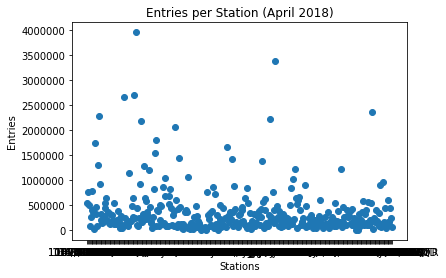

In [57]:
x = total_by_station['STATION']
y = total_by_station['total_ppl']

plt.scatter(x, y)
plt.xlabel("Stations")
plt.ylabel("Entries")
plt.title("Entries per Station (April 2018)")

In [58]:
#Mean is higher than the median, this data is skewed right

total_by_station.describe()

,total_ppl
count,3.720000e+02
mean,3.596813e+05
std,4.790247e+05
min,3.515000e+03
25%,1.084992e+05
50%,2.075925e+05
75%,4.024262e+05
max,3.948737e+06


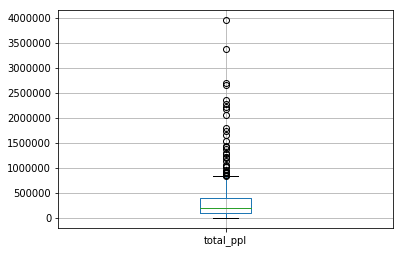

In [59]:
total_by_station.boxplot();

In [60]:
#Focus on first quartile

first_quartile = total_by_station['total_ppl'] > 4.024262e+05
total_by_station[first_quartile].count()

STATION      93
total_ppl    93
dtype: int64

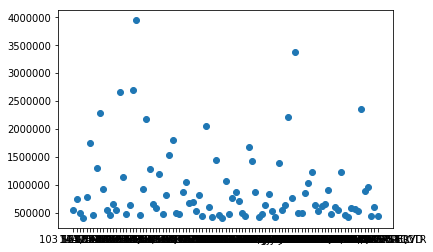

In [61]:
x = total_by_station[first_quartile]['STATION']
y = total_by_station[first_quartile]['total_ppl']
plt.scatter(x,y)

In [62]:
type(total_by_date['DATE_2'])

pandas.core.series.Series

In [63]:
#Calculate day of the week

total_by_date['weekday'] = pd.to_datetime(total_by_date['DATE_2']).dt.dayofweek

In [64]:
total_by_date.head()

,STATION,DATE_2,incremental_ppl,weekday
0,1 AV,2018-03-31,15187.0,5
1,1 AV,2018-04-01,10883.0,6
2,1 AV,2018-04-02,18060.0,0
3,1 AV,2018-04-03,19425.0,1
4,1 AV,2018-04-04,20189.0,2


In [65]:
total_by_date.groupby(by = ['weekday']).sum()

,incremental_ppl
weekday,
0,21208065.0
1,22783331.0
2,22866972.0
3,23251105.0
4,22081559.0
5,12433892.0
6,9176507.0


In [66]:
weekday_total = total_by_date.groupby(by = ['weekday']).sum()

In [67]:
weekday_total.reset_index()

,weekday,incremental_ppl
0,0,21208065.0
1,1,22783331.0
2,2,22866972.0
3,3,23251105.0
4,4,22081559.0
5,5,12433892.0
6,6,9176507.0


In [68]:
weekday_total = weekday_total.reset_index()

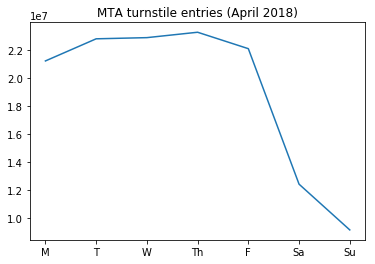

In [69]:
import numpy as np
x = weekday_total.weekday
y = weekday_total.incremental_ppl

labels = ['M','T','W','Th','F','Sa', 'Su']
plt.plot(x,y);
plt.xticks(np.arange(7), (labels));
plt.title('MTA turnstile entries (April 2018)');

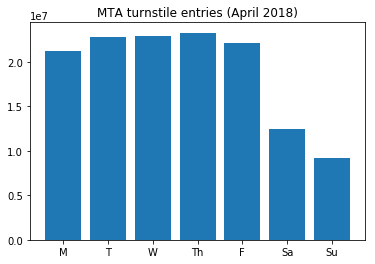

In [70]:
plt.bar(x,y);
plt.xticks(np.arange(7), (labels));
plt.title('MTA turnstile entries (April 2018)');

In [71]:
mta_df2.groupby(by = ['STATION', 'TIME'], as_index = False)[['incremental_ppl']].sum().head()

,STATION,TIME,incremental_ppl
0,1 AV,00:00:00,96555.0
1,1 AV,08:00:00,34111.0
2,1 AV,12:00:00,118826.0
3,1 AV,16:00:00,127660.0
4,1 AV,20:00:00,170657.0


In [72]:
time_of_day = mta_df2.groupby(by = ['STATION', 'TIME'], as_index = False)[['incremental_ppl']].sum()

In [73]:
time_of_day.rename(columns = {'incremental_ppl': 'total_ppl'}, inplace = True)

In [74]:
time_of_day.sort_values(by = ['total_ppl'], ascending = (False))

,STATION,TIME,total_ppl
1301,34 ST-HERALD SQ,20:00:00,1118832.0
24442,TIMES SQ-42 ST,20:00:00,1006496.0
116,14 ST-UNION SQ,21:00:00,977965.0
1318,34 ST-PENN STA,20:00:00,811241.0
1311,34 ST-PENN STA,12:00:00,782713.0
1380,47-50 STS ROCK,20:00:00,771328.0
1230,23 ST,20:00:00,758851.0
1457,59 ST COLUMBUS,20:00:00,734707.0
115,14 ST-UNION SQ,17:00:00,724099.0
7509,GRD CNTRL-42 ST,21:00:00,721979.0


In [75]:
(total_by_station
.sort_values(by = ['total_ppl'], ascending = (False))
 
.head(20)
)

,STATION,total_ppl
59,34 ST-PENN STA,3948737.0
229,GRD CNTRL-42 ST,3375891.0
57,34 ST-HERALD SQ,2699590.0
45,23 ST,2653383.0
347,TIMES SQ-42 ST,2364082.0
14,14 ST-UNION SQ,2278722.0
222,FULTON ST,2215654.0
65,42 ST-PORT AUTH,2185570.0
107,86 ST,2056315.0
83,59 ST COLUMBUS,1804594.0


In [256]:
total_by_station.count()

STATION      372
total_ppl    372
dtype: int64

In [76]:
mta_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATE_TIME,DATE_2,incremental_ppl
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,08:00:00,REGULAR,6566495,2018-04-02 07:59:00,2018-04-02,25.0
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,12:00:00,REGULAR,6566629,2018-04-02 11:59:00,2018-04-02,134.0
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,16:00:00,REGULAR,6566839,2018-04-02 15:59:00,2018-04-02,210.0
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,20:00:00,REGULAR,6567469,2018-04-02 19:59:00,2018-04-02,630.0
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/03/2018,00:00:00,REGULAR,6567630,2018-04-02 23:59:00,2018-04-02,161.0


In [77]:


#    station_filter = mta_df2['STATION'] == 'GRD CNTRL-42 ST'

In [78]:
#mta_df2[grand_central_filter]

In [79]:
#grand_central = mta_df2[grand_central_filter]

In [80]:
total_by_date.columns

Index(['STATION', 'DATE_2', 'incremental_ppl', 'weekday'], dtype='object')

In [81]:
total_by_date.groupby(by = ['STATION', 'weekday']).sum().reset_index()

,STATION,weekday,incremental_ppl
0,1 AV,0,81058.0
1,1 AV,1,84998.0
2,1 AV,2,87777.0
3,1 AV,3,88698.0
4,1 AV,4,88943.0
5,1 AV,5,69082.0
6,1 AV,6,47253.0
7,103 ST,0,117314.0
8,103 ST,1,126877.0
9,103 ST,2,127060.0


In [82]:
def station_by_day(station_name):
    
    station_name_mask = total_by_date.groupby(by = ['STATION', 'weekday']).sum().reset_index().STATION == station_name

    return total_by_date.groupby(by = ['STATION', 'weekday']).sum().reset_index()[station_name_mask]

In [83]:
station_by_day('FULTON ST')

,STATION,weekday,incremental_ppl
1554,FULTON ST,0,362883.0
1555,FULTON ST,1,391600.0
1556,FULTON ST,2,388163.0
1557,FULTON ST,3,398653.0
1558,FULTON ST,4,379151.0
1559,FULTON ST,5,173179.0
1560,FULTON ST,6,122025.0


In [84]:
station_by_day('PATH NEW WTC')

,STATION,weekday,incremental_ppl
2163,PATH NEW WTC,0,213531.0
2164,PATH NEW WTC,1,229812.0
2165,PATH NEW WTC,2,229633.0
2166,PATH NEW WTC,3,227084.0
2167,PATH NEW WTC,4,205346.0
2168,PATH NEW WTC,5,67755.0
2169,PATH NEW WTC,6,49443.0


In [85]:
station_by_day ('GRD CNTRL-42 ST')

,STATION,weekday,incremental_ppl
1603,GRD CNTRL-42 ST,0,577995.0
1604,GRD CNTRL-42 ST,1,616453.0
1605,GRD CNTRL-42 ST,2,618623.0
1606,GRD CNTRL-42 ST,3,617595.0
1607,GRD CNTRL-42 ST,4,564519.0
1608,GRD CNTRL-42 ST,5,218055.0
1609,GRD CNTRL-42 ST,6,162651.0


In [86]:
grand_central_by_weekday = station_by_day ('GRD CNTRL-42 ST')

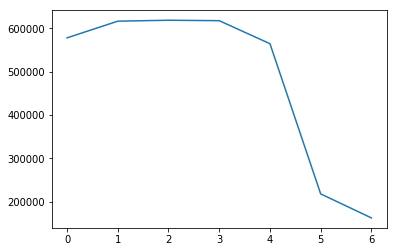

In [87]:
grand_centralx = grand_central_by_weekday.weekday
grand_centraly = grand_central_by_weekday.incremental_ppl

plt.plot(grand_centralx, grand_centraly)

In [88]:
def station_time (station_name):

    station_time_mask = time_of_day.STATION == station_name
    return time_of_day[station_time_mask]

In [89]:
station_time('GRD CNTRL-42 ST')

,STATION,TIME,total_ppl
7499,GRD CNTRL-42 ST,00:00:00,204913.0
7500,GRD CNTRL-42 ST,05:00:00,6159.0
7501,GRD CNTRL-42 ST,08:00:00,134683.0
7502,GRD CNTRL-42 ST,09:00:00,216941.0
7503,GRD CNTRL-42 ST,12:00:00,417376.0
7504,GRD CNTRL-42 ST,13:00:00,251601.0
7505,GRD CNTRL-42 ST,13:25:21,386.0
7506,GRD CNTRL-42 ST,16:00:00,357952.0
7507,GRD CNTRL-42 ST,17:00:00,401018.0
7508,GRD CNTRL-42 ST,20:00:00,662883.0


Text(0.5,1,'Grand Central turnstile Entries by time of day')

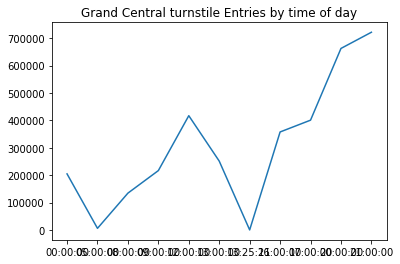

In [90]:
plt.plot(station_time('GRD CNTRL-42 ST').TIME,station_time('GRD CNTRL-42 ST').total_ppl)
plt.title("Grand Central turnstile Entries by time of day")
#plt.xticks

In [91]:
station_time('FULTON ST')

,STATION,TIME,total_ppl
7451,FULTON ST,00:00:00,20518.0
7452,FULTON ST,05:00:00,10738.0
7453,FULTON ST,07:00:00,6602.0
7454,FULTON ST,08:00:00,11377.0
7455,FULTON ST,09:00:00,167230.0
7456,FULTON ST,11:00:00,87425.0
7457,FULTON ST,12:00:00,23507.0
7458,FULTON ST,13:00:00,231458.0
7459,FULTON ST,15:00:00,114055.0
7460,FULTON ST,16:00:00,39759.0


Text(0.5,1,'Fulton Center turnstile Entries by time of day')

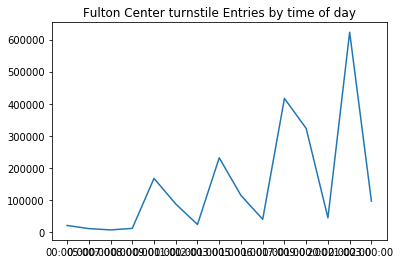

In [92]:
plt.plot(station_time('FULTON ST').TIME,station_time('FULTON ST').total_ppl)
plt.title("Fulton Center turnstile Entries by time of day")
#plt.xticks

In [93]:
station_time('PATH NEW WTC')

,STATION,TIME,total_ppl
18524,PATH NEW WTC,04:13:12,8.0
18525,PATH NEW WTC,04:14:13,43.0
18526,PATH NEW WTC,04:14:20,45.0
18527,PATH NEW WTC,04:14:26,23.0
18528,PATH NEW WTC,04:14:55,6.0
18529,PATH NEW WTC,04:15:30,171.0
18530,PATH NEW WTC,04:16:22,6.0
18531,PATH NEW WTC,04:16:52,78.0
18532,PATH NEW WTC,04:19:07,4.0
18533,PATH NEW WTC,04:19:16,1.0


In [94]:
#plt.plot(station_time('PATH NEW WTC').TIME,station_time('PATH NEW WTC').total_ppl)
#plt.title("Path New WTC turnstile Entries by time of day")
#plt.xticks

In [ ]:
#plt.plot(station_time('PATH NEW WTC')['TIME'].hist(bins = 12))

In [101]:
station_geo = pd.read_csv('/Users/kelly/metis_v3/konelson-mta-project/station_geo_out.csv')

In [102]:
station_geo.columns

Index(['LAT', 'LON', 'STATION', 'zipcode'], dtype='object')

In [103]:
station_geo.head()

,LAT,LON,STATION,zipcode
0,40.733354,-73.870983,WOODHAVEN BLVD & QUEENS BLVD AT SW CORNER,11373
1,40.733041,-73.870334,WOODHAVEN BLVD & QUEENS BLVD AT SE CORNER,11373
2,40.693451,-73.852556,WOODHAVEN BLVD & JAMAICA AVE AT SW CORNER,11421
3,40.693563,-73.852608,WOODHAVEN BLVD & JAMAICA AVE AT NW CORNER,11421
4,40.706385,-74.009658,WILLIAM ST & WALL ST AT SW CORNER,10005


In [104]:
station_geo.tail()

,LAT,LON,STATION,zipcode
1593,40.749973,-73.862425,103RD ST & ROOSEVELT AVE AT NE CORNER,11368
1594,40.660372,-73.830369,103RD ST & 159TH AVE AT SE CORNER,11414
1595,40.660486,-73.830453,103RD ST & 159TH AVE AT NE CORNER,11414
1596,40.515532,-74.24548477,& ELLIS ST AT S CORNER,10307
1597,40.702033,-74.013149,NaN,10004


In [105]:
station_geo['STATION'].unique

<bound method Series.unique of 0          WOODHAVEN BLVD & QUEENS BLVD AT SW CORNER
1          WOODHAVEN BLVD & QUEENS BLVD AT SE CORNER
2          WOODHAVEN BLVD & JAMAICA AVE AT SW CORNER
3          WOODHAVEN BLVD & JAMAICA AVE AT NW CORNER
4                  WILLIAM ST & WALL ST AT SW CORNER
5                  WILLIAM ST & WALL ST AT SE CORNER
6                  WILLIAM ST & WALL ST AT NW CORNER
7                  WILLIAM ST & WALL ST AT NE CORNER
8                  WILLIAM ST & PINE ST AT SE CORNER
9                  WILLIAM ST & JOHN ST AT NE CORNER
10               WILLIAM ST & FULTON ST AT SE CORNER
11                WILLIAM ST & CEDAR ST AT NW CORNER
12       WHITLOCK AVE & WESTCHESTER AVE AT SW CORNER
13       WHITLOCK AVE & WESTCHESTER AVE AT SE CORNER
14        WHITE PLAINS RD & PELHAM PKWY AT SW CORNER
15        WHITE PLAINS RD & PELHAM PKWY AT SE CORNER
16        WHITE PLAINS RD & PELHAM PKWY AT NW CORNER
17        WHITE PLAINS RD & PELHAM PKWY AT NE CORNER
18         WHIT

In [108]:
total_by_station['STATION'].unique

<bound method Series.unique of 0                 1 AV
1               103 ST
2        103 ST-CORONA
3               104 ST
4               110 ST
5               111 ST
6               116 ST
7      116 ST-COLUMBIA
8               121 ST
9               125 ST
10              135 ST
11     137 ST CITY COL
12      138/GRAND CONC
13               14 ST
14      14 ST-UNION SQ
15              145 ST
16      149/GRAND CONC
17         14TH STREET
18      15 ST-PROSPECT
19              155 ST
20              157 ST
21     161/YANKEE STAD
22              167 ST
23              168 ST
24              169 ST
25              170 ST
26              174 ST
27         174-175 STS
28              175 ST
29              176 ST
            ...       
342     SUTPHIN-ARCHER
343          SUTTER AV
344    SUTTER AV-RUTLD
345          THIRTY ST
346    THIRTY THIRD ST
347     TIMES SQ-42 ST
348      TOMPKINSVILLE
349         TREMONT AV
350    TWENTY THIRD ST
351           UNION ST
352           UTICA AV
353

In [130]:
station_geo['STATION'].iloc[:]

0          WOODHAVEN BLVD & QUEENS BLVD AT SW CORNER
1          WOODHAVEN BLVD & QUEENS BLVD AT SE CORNER
2          WOODHAVEN BLVD & JAMAICA AVE AT SW CORNER
3          WOODHAVEN BLVD & JAMAICA AVE AT NW CORNER
4                  WILLIAM ST & WALL ST AT SW CORNER
5                  WILLIAM ST & WALL ST AT SE CORNER
6                  WILLIAM ST & WALL ST AT NW CORNER
7                  WILLIAM ST & WALL ST AT NE CORNER
8                  WILLIAM ST & PINE ST AT SE CORNER
9                  WILLIAM ST & JOHN ST AT NE CORNER
10               WILLIAM ST & FULTON ST AT SE CORNER
11                WILLIAM ST & CEDAR ST AT NW CORNER
12       WHITLOCK AVE & WESTCHESTER AVE AT SW CORNER
13       WHITLOCK AVE & WESTCHESTER AVE AT SE CORNER
14        WHITE PLAINS RD & PELHAM PKWY AT SW CORNER
15        WHITE PLAINS RD & PELHAM PKWY AT SE CORNER
16        WHITE PLAINS RD & PELHAM PKWY AT NW CORNER
17        WHITE PLAINS RD & PELHAM PKWY AT NE CORNER
18         WHITE PLAINS RD & NEREID AVE AT SE 

In [136]:
type(station_geo['STATION'])

pandas.core.series.Series

In [151]:
(station_geo['STATION']
 .apply(lambda x: str(x).replace(' AT SW CORNER',''))
 .apply(lambda x: str(x).replace(' AT SE CORNER',''))
 .apply(lambda x: str(x).replace(' AT NW CORNER',''))
 .apply(lambda x: str(x).replace(' AT NE CORNER',''))
 .apply(lambda x: str(x).replace(' (EXIT ONLY)',''))
)

0         WOODHAVEN BLVD & QUEENS BLVD
1         WOODHAVEN BLVD & QUEENS BLVD
2         WOODHAVEN BLVD & JAMAICA AVE
3         WOODHAVEN BLVD & JAMAICA AVE
4                 WILLIAM ST & WALL ST
5                 WILLIAM ST & WALL ST
6                 WILLIAM ST & WALL ST
7                 WILLIAM ST & WALL ST
8                 WILLIAM ST & PINE ST
9                 WILLIAM ST & JOHN ST
10              WILLIAM ST & FULTON ST
11               WILLIAM ST & CEDAR ST
12      WHITLOCK AVE & WESTCHESTER AVE
13      WHITLOCK AVE & WESTCHESTER AVE
14       WHITE PLAINS RD & PELHAM PKWY
15       WHITE PLAINS RD & PELHAM PKWY
16       WHITE PLAINS RD & PELHAM PKWY
17       WHITE PLAINS RD & PELHAM PKWY
18        WHITE PLAINS RD & NEREID AVE
19        WHITE PLAINS RD & NEREID AVE
20         WHITE PLAINS RD & BURKE AVE
21      WHITE PLAINS RD & ALLERTON AVE
22      WHITE PLAINS RD & ALLERTON AVE
23          WHITE PLAINS RD & 241ST ST
24          WHITE PLAINS RD & 241ST ST
25          WHITE PLAINS 

In [152]:
station_geo['STATION_2'] = (station_geo['STATION']
 .apply(lambda x: str(x).replace(' AT SW CORNER',''))
 .apply(lambda x: str(x).replace(' AT SE CORNER',''))
 .apply(lambda x: str(x).replace(' AT NW CORNER',''))
 .apply(lambda x: str(x).replace(' AT NE CORNER',''))
 .apply(lambda x: str(x).replace(' (EXIT ONLY)',''))
)

In [153]:
station_geo['STATION_2'].head()

0    WOODHAVEN BLVD & QUEENS BLVD
1    WOODHAVEN BLVD & QUEENS BLVD
2    WOODHAVEN BLVD & JAMAICA AVE
3    WOODHAVEN BLVD & JAMAICA AVE
4            WILLIAM ST & WALL ST
Name: STATION_2, dtype: object

In [160]:
station_geo.groupby(by = ['STATION_2', 'zipcode']).head()

,LAT,LON,STATION,zipcode,STATION_2
0,40.733354,-73.870983,WOODHAVEN BLVD & QUEENS BLVD AT SW CORNER,11373,WOODHAVEN BLVD & QUEENS BLVD
1,40.733041,-73.870334,WOODHAVEN BLVD & QUEENS BLVD AT SE CORNER,11373,WOODHAVEN BLVD & QUEENS BLVD
2,40.693451,-73.852556,WOODHAVEN BLVD & JAMAICA AVE AT SW CORNER,11421,WOODHAVEN BLVD & JAMAICA AVE
3,40.693563,-73.852608,WOODHAVEN BLVD & JAMAICA AVE AT NW CORNER,11421,WOODHAVEN BLVD & JAMAICA AVE
4,40.706385,-74.009658,WILLIAM ST & WALL ST AT SW CORNER,10005,WILLIAM ST & WALL ST
5,40.706272,-74.009447,WILLIAM ST & WALL ST AT SE CORNER,10005,WILLIAM ST & WALL ST
6,40.706506,-74.009544,WILLIAM ST & WALL ST AT NW CORNER,10005,WILLIAM ST & WALL ST
7,40.706392,-74.009332,WILLIAM ST & WALL ST AT NE CORNER,10005,WILLIAM ST & WALL ST
8,40.706755,-74.008804,WILLIAM ST & PINE ST AT SE CORNER,10005,WILLIAM ST & PINE ST
9,40.708630,-74.006999,WILLIAM ST & JOHN ST AT NE CORNER,10038,WILLIAM ST & JOHN ST


In [163]:
station_geo.drop(columns = ['STATION'])

,LAT,LON,zipcode,STATION_2
0,40.733354,-73.870983,11373,WOODHAVEN BLVD & QUEENS BLVD
1,40.733041,-73.870334,11373,WOODHAVEN BLVD & QUEENS BLVD
2,40.693451,-73.852556,11421,WOODHAVEN BLVD & JAMAICA AVE
3,40.693563,-73.852608,11421,WOODHAVEN BLVD & JAMAICA AVE
4,40.706385,-74.009658,10005,WILLIAM ST & WALL ST
5,40.706272,-74.009447,10005,WILLIAM ST & WALL ST
6,40.706506,-74.009544,10005,WILLIAM ST & WALL ST
7,40.706392,-74.009332,10005,WILLIAM ST & WALL ST
8,40.706755,-74.008804,10005,WILLIAM ST & PINE ST
9,40.708630,-74.006999,10038,WILLIAM ST & JOHN ST


In [188]:
station_geo.groupby(by = ['STATION_2', 'zipcode'], as_index = False).count()

,STATION_2,zipcode,LAT,LON,STATION
0,& ELLIS ST AT S CORNER,10307,1,1,1
1,103RD ST & 159TH AVE,11414,2,2,2
2,103RD ST & ROOSEVELT AVE,11368,2,2,2
3,104TH ST & JAMAICA AVE,11418,2,2,2
4,104TH ST & LIBERTY AVE,11417,2,2,2
5,108TH ST & QUEENS BLVD,11375,1,1,1
6,109TH ST & LIBERTY AVE,11419,2,2,2
7,10TH AVE & 207TH ST,10034,4,4,4
8,10TH AVE & 215TH ST,10034,4,4,4
9,111TH ST & JAMAICA BLVD,11418,2,2,2


In [244]:
import pickle

In [246]:
with open ('MTA_DF.pickle', 'wb') as to_write:
    pickle.dump(mta_df2, to_write)

In [247]:
mta_df2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'DATE_TIME', 'DATE_2', 'incremental_ppl'],
      dtype='object')

In [253]:
mta_df2.groupby(by = ['STATION', 'UNIT']).count()

C/A   SCP  LINENAME  DIVISION  DATE  TIME  DESC  \
STATION         UNIT                                                     
1 AV            R248  1380  1380      1380      1380  1380  1380  1380   
103 ST          R180   827   827       827       827   827   827   827   
                R191   848   848       848       848   848   848   848   
                R314   415   415       415       415   415   415   415   
103 ST-CORONA   R208  1250  1250      1250      1250  1250  1250  1250   
104 ST          R007   390   390       390       390   390   390   390   
                R354   545   545       545       545   545   545   545   
110 ST          R181   773   773       773       773   773   773   773   
111 ST          R008   519   519       519       519   519   519   519   
                R310   691   691       691       691   691   691   691   
                R355   696   696       696       696   696   696   696   
116 ST          R182  1035  1035      1035      1035  1035  1035  1035   
                R324  1049  1049      1049      1049  1049  1049  1049   
                R333   691   691       691       691   691   691   691   
116 ST-COLUMBIA R159   840   840       840       840   840   840   840   
121 ST          R009   633   633       633       633   633   633   633   
125 ST          R034   695   695       695       695   695   695   695   
                R102  1998  1998      1998      1998  1998  1998  1998   
                R132  1585  1585      1585      1585  1585  1585  1585   
                R206   891   891       891       891   891   891   891   
135 ST          R207  1144  1144      1144      1144  1144  1144  1144   
                R332  1161  1161      1161      1161  1161  1161  1161   
137 ST CITY COL R169  1365  1365      1365      1365  1365  1365  1365   
138/GRAND CONC  R307   417   417       417       417   417   417   417   
14 ST           R105  1946  1946      1946      1946  1946  1946  1946   
                R163  2443  2443      2443      2443  2443  2443  2443   
                R175  1256  1256      1256      1256  1256  1256  1256   
14 ST-UNION SQ  R170  5050  5050      5050      5050  5050  5050  5050   
145 ST          R101  1250  1250      1250      1250  1250  1250  1250   
                R273   975   975       975       975   975   975   975   
...                    ...   ...       ...       ...   ...   ...   ...   
THIRTY THIRD ST R541  1823  1823      1823      1823  1823  1823  1823   
TIMES SQ-42 ST  R032  3294  3294      3294      3294  3294  3294  3294   
                R033  3249  3249      3249      3249  3249  3249  3249   
TOMPKINSVILLE   R165   687   687       687       687   687   687   687   
TREMONT AV      R154  1257  1257      1257      1257  1257  1257  1257   
TWENTY THIRD ST R542  1022  1022      1022      1022  1022  1022  1022   
UNION ST        R231   768   768       768       768   768   768   768   
UTICA AV        R153  1297  1297      1297      1297  1297  1297  1297   
V.CORTLANDT PK  R117   558   558       558       558   558   558   558   
VAN SICLEN AV   R068   490   490       490       490   490   490   490   
                R434   418   418       418       418   418   418   418   
VAN SICLEN AVE  R441   416   416       416       416   416   416   416   
VERNON-JACKSON  R276  1332  1332      1332      1332  1332  1332  1332   
W 4 ST-WASH SQ  R138  2403  2403      2403      2403  2403  2403  2403   
W 8 ST-AQUARIUM R312   831   831       831       831   831   831   831   
WAKEFIELD/241   R145   695   695       695       695   695   695   695   
WALL ST         R027  2247  2247      2247      2247  2247  2247  2247   
                R043  2912  2912      2912      2912  2912  2912  2912   
WEST FARMS SQ   R387   979   979       979       979   979   979   979   
WESTCHESTER SQ  R107   383   383       383       383   383   383   383   
WHITEHALL S-FRY R001  2003  2003      2003      2003  2003  2003  2003   
WHITLOCK AV     R325   557 

In [254]:
mta_df2.groupby(by = ['UNIT', 'STATION']).count()

C/A   SCP  LINENAME  DIVISION  DATE  TIME  DESC  \
UNIT STATION                                                             
R001 SOUTH FERRY      2090  2090      2090      2090  2090  2090  2090   
     WHITEHALL S-FRY  2003  2003      2003      2003  2003  2003  2003   
R003 CYPRESS HILLS     391   391       391       391   391   391   391   
R004 75 ST-ELDERTS     650   650       650       650   650   650   650   
R005 85 ST-FOREST PK   521   521       521       521   521   521   521   
R006 WOODHAVEN BLVD    787   787       787       787   787   787   787   
R007 104 ST            390   390       390       390   390   390   390   
R008 111 ST            519   519       519       519   519   519   519   
R009 121 ST            633   633       633       633   633   633   633   
R010 42 ST-PORT AUTH  2401  2401      2401      2401  2401  2401  2401   
R011 42 ST-PORT AUTH  3531  3531      3531      3531  3531  3531  3531   
R012 34 ST-PENN STA   4680  4680      4680      4680  4680  4680  4680   
R013 34 ST-PENN STA   2637  2637      2637      2637  2637  2637  2637   
R014 FULTON ST        5770  5770      5770      5770  5770  5770  5770   
R015 5 AV/53 ST       2479  2479      2479      2479  2479  2479  2479   
R016 LEXINGTON AV/53  1119  1119      1119      1119  1119  1119  1119   
R017 LEXINGTON AV/53  2890  2890      2890      2890  2890  2890  2890   
R018 74 ST-BROADWAY    687   687       687       687   687   687   687   
     JKSN HT-ROOSVLT  2871  2871      2871      2871  2871  2871  2871   
R019 JAMAICA 179 ST   3049  3049      3049      3049  3049  3049  3049   
R020 47-50 STS ROCK   4174  4174      4174      4174  4174  4174  4174   
R021 42 ST-BRYANT PK  2870  2870      2870      2870  2870  2870  2870   
R022 34 ST-HERALD SQ  4207  4207      4207      4207  4207  4207  4207   
R023 34 ST-HERALD SQ  2616  2616      2616      2616  2616  2616  2616   
R024 SUTPHIN-ARCHER   1535  1535      1535      1535  1535  1535  1535   
R025 JAMAICA CENTER   2522  2522      2522      2522  2522  2522  2522   
R027 WALL ST          2247  2247      2247      2247  2247  2247  2247   
R028 FULTON ST        3989  3989      3989      3989  3989  3989  3989   
R029 CHAMBERS ST      3310  3310      3310      3310  3310  3310  3310   
     PARK PLACE        398   398       398       398   398   398   398   
...                    ...   ...       ...       ...   ...   ...   ...   
R461 B'WAY-LAFAYETTE  2748  2748      2748      2748  2748  2748  2748   
R462 CANAL ST         1506  1506      1506      1506  1506  1506  1506   
R463 CANAL ST         2097  2097      2097      2097  2097  2097  2097   
R464 AQUEDUCT RACETR   568   568       568       568   568   568   568   
R468 RIT-MANHATTAN     405   405       405       405   405   405   405   
R469 RIT-ROOSEVELT     510   510       510       510   510   510   510   
R535 HOWARD BCH JFK   1209  1209      1209      1209  1209  1209  1209   
R536 JFK JAMAICA CT1  1454  1454      1454      1454  1454  1454  1454   
R540 PATH NEW WTC     5457  5457      5457      5457  5457  5457  5457   
     PATH WTC 2        642   642       642       642   642   642   642   
R541 THIRTY ST         659   659       659       659   659   659   659   
     THIRTY THIRD ST  1823  1823      1823      1823  1823  1823  1823   
R542 TWENTY THIRD ST  1022  1022      1022      1022  1022  1022  1022   
R543 EXCHANGE PLACE   2684  2684      2684      2684  2684  2684  2684   
R544 HARRISON         1535  1535      1535      1535  1535  1535  1535   
R545 14TH STREET      1300  1300      1300      1300  1300  1300  1300   
R546 PAVONIA/NEWPORT  1405  1405      1405      1405  1405  1405  1405   
R547 9TH STREET        629   629       629       629   629   629   629   
R548 CHRISTOPHER ST    525   525       525       525   525   525   525   
R549 NEWARK BM BW     2159  2159      2159      2159  2159  2159  2159   
     NEWARK C         1581  1581      1581      1581  1581  1581  1581   
     NEWARK HM HE      558 

In [255]:
mta_df2.shape

(558838, 13)